## 1.8 Exercise

In this exercise, you will apply what you have learned to a new dataset containing daily climate data from Delhi, India. The goal is to forecast the mean daily temperature.

The dataset is split into a training and a test file.

### Tasks:

1. Load the file `DailyDelhiClimateTrain.csv` from the `datasets` folder.
2. Use `pd.to_datetime` to convert the `date` column to datetime format, and set it as the index.
3. Keep only the `meantemp` column.
4. Train a `Prophet` model on the training data.
5. Use the model to forecast 1000 future time points.
6. Plot the forecasted values.
7. Load the file `DailyDelhiClimateTest.csv` and format it in the same way.
8. Use the model to forecast the dates in the test dataset.
9. Plot the predictions alongside the true test data.

In [ ]:
import pandas as pd

df_train = pd.read_csv(
    "https://raw.githubusercontent.com/digital-sustainability/SAI3-2025/refs/heads/main/datasets/DailyDelhiClimateTrain.csv"
)
df_train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [11]:
df_train.dtypes

date             object
meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object

In [12]:
df_train.date = pd.to_datetime(df_train["date"])
df_train.set_index("date", inplace=True)
df_train = df_train[["meantemp"]]

df_train.head()

,meantemp
date,
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667
2013-01-04,8.666667
2013-01-05,6.000000


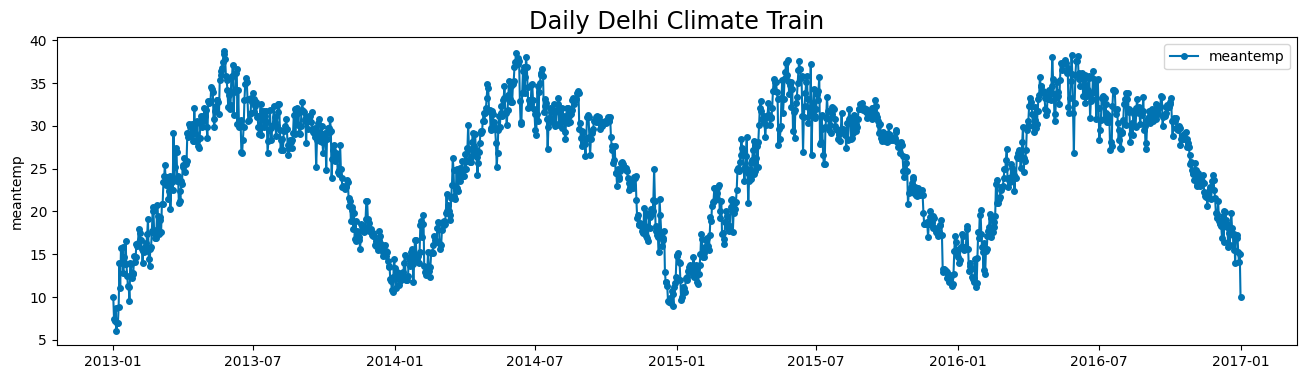

In [15]:
from sktime.utils.plotting import plot_series

plot_series(df_train, labels=["meantemp"], title="Daily Delhi Climate Train");

23:01:03 - cmdstanpy - INFO - Chain [1] start processing
23:01:03 - cmdstanpy - INFO - Chain [1] done processing


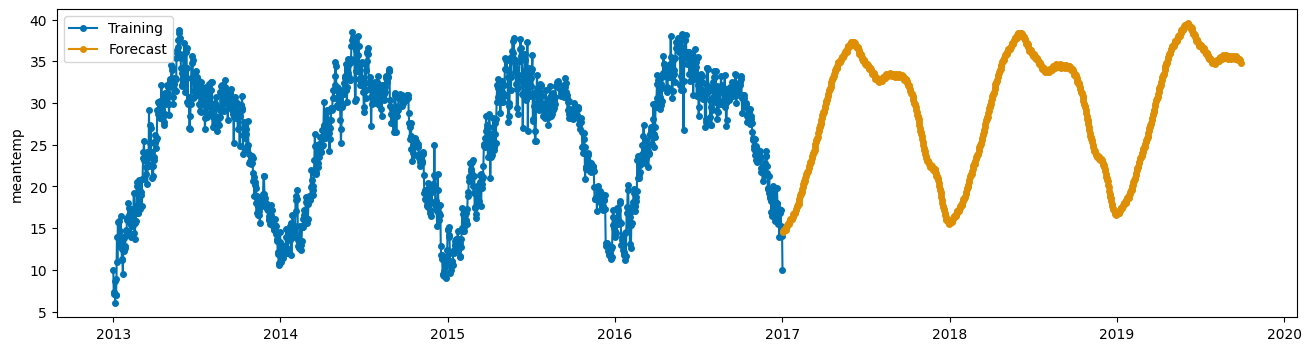

In [19]:
from sktime.forecasting.fbprophet import Prophet

forecaster = Prophet(seasonality_mode="additive")
forecaster.fit(df_train)

# Predict on test dates
y_pred = forecaster.predict(fh=range(1, 1001))

# Plot forecast
plot_series(df_train, y_pred, labels=["Training", "Forecast"]);

In [20]:
df_test = pd.read_csv(
    "https://raw.githubusercontent.com/digital-sustainability/SAI3-2025/refs/heads/main/datasets/DailyDelhiClimateTest.csv"
)
df_test.date = pd.to_datetime(df_test["date"])
df_test.set_index("date", inplace=True)
df_test = df_test[["meantemp"]]

df_test.head()

,meantemp
date,
2017-01-01,15.913043
2017-01-02,18.500000
2017-01-03,17.111111
2017-01-04,18.700000
2017-01-05,18.388889


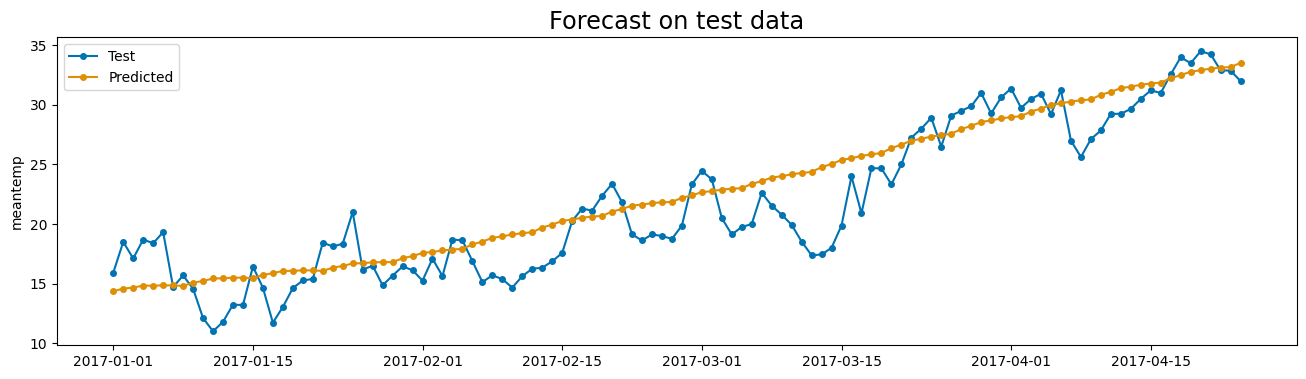

In [22]:
y_pred_test = forecaster.predict(fh=df_test.index)
plot_series(df_test, y_pred_test, labels=["Test", "Predicted"], title="Forecast on test data");